In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Teja\Documents\teja intern prodigyy\TASK 5\Road Accident Data.csv") 

In [3]:
df

Accident_Index Accident Date Day_of_Week              Junction_Control  \
0       200901BS70001      1/1/2021    Thursday      Give way or uncontrolled   
1       200901BS70002      1/5/2021      Monday      Give way or uncontrolled   
2       200901BS70003      1/4/2021      Sunday      Give way or uncontrolled   
3       200901BS70004      1/5/2021      Monday           Auto traffic signal   
4       200901BS70005      1/6/2021     Tuesday           Auto traffic signal   
...               ...           ...         ...                           ...   
307968  201091NM01760     2/18/2022    Thursday  Data missing or out of range   
307969  201091NM01881     2/21/2022      Sunday  Data missing or out of range   
307970  201091NM01935     2/23/2022     Tuesday      Give way or uncontrolled   
307971  201091NM01964     2/23/2022     Tuesday      Give way or uncontrolled   
307972  201091NM02142     2/28/2022      Sunday      Give way or uncontrolled   

                            Junction_Detail Accident_Severity   Latitude  \
0                   T or staggered junction           Serious  51.512273   
1                                Crossroads           Serious  51.514399   
2                   T or staggered junction            Slight  51.486668   
3                   T or staggered junction           Serious  51.507804   
4                                Crossroads           Serious  51.482076   
...                                     ...               ...        ...   
307968  Not at junction or within 20 metres            Slight  57.374005   
307969  Not at junction or within 20 metres            Slight  57.232273   
307970              T or staggered junction            Slight  57.585044   
307971              T or staggered junction           Serious  57.214898   
307972              T or staggered junction           Serious  57.575210   

              Light_Conditions Local_Authority_(District)  \
0                     Daylight     Kensington and Chelsea   
1                     Daylight     Kensington and Chelsea   
2                     Daylight     Kensington and Chelsea   
3                     Daylight     Kensington and Chelsea   
4        Darkness - lights lit     Kensington and Chelsea   
...                        ...                        ...   
307968                Daylight                   Highland   
307969  Darkness - no lighting                   Highland   
307970                Daylight                   Highland   
307971  Darkness - no lighting                   Highland   
307972                Daylight                   Highland   

         Carriageway_Hazards  ...  Number_of_Casualties  Number_of_Vehicles  \
0                        NaN  ...                     1                   2   
1                        NaN  ...                    11                   2   
2                        NaN  ...                     1                   2   
3                        NaN  ...                     1                   2   
4                        NaN  ...                     1                   2   
...                      ...  ...                   ...                 ...   
307968                   NaN  ...                     2                   1   
307969                   NaN  ...                     1                   1   
307970                   NaN  ...                     1                   3   
307971                   NaN  ...                     1                   2   
307972  Other object on road  ...                     1                   1   

               Police_Force Road_Surface_Conditions           Road_Type  \
0       Metropolitan Police                     Dry      One way street   
1       Metropolitan Police             Wet or damp  Single carriageway   
2       Metropolitan Police                     Dry  Single carriageway   
3       Metropolitan Police            Frost or ice  Single carriageway   
4       Metropolitan Police                     Dry  Single carr

In [4]:
df.loc[:, 'Accident Date'] = pd.to_datetime(df['Accident Date'], format='%m/%d/%Y')


In [5]:
df.fillna('Unknown', inplace=True) 

In [6]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Light_Conditions            307973 non-null  object        
 8   Local_Authority_(District)  307973 non-null  object        
 9   Carriageway_Hazards         307973 non-null  object        
 10  Longitude                   307973 non-null  float64       
 11  Number_of_Casualties        307973 non-

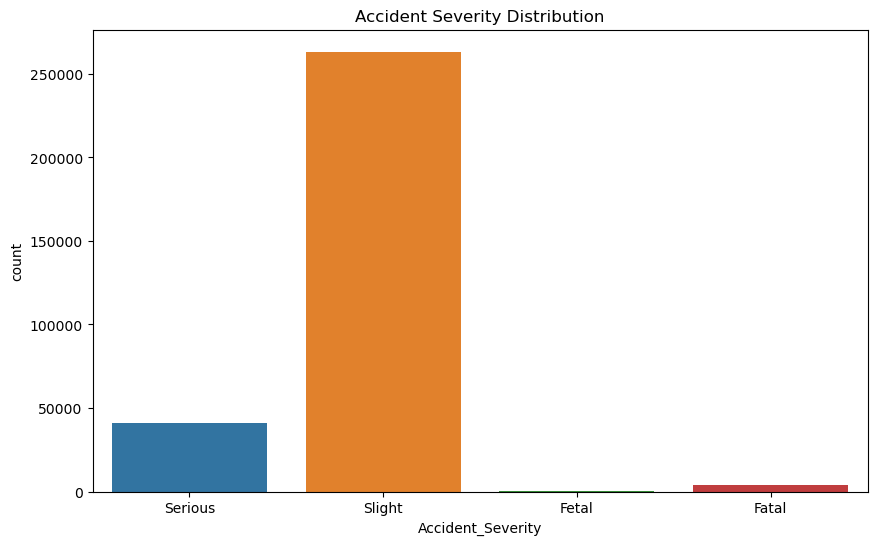

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Accident_Severity')
plt.title('Accident Severity Distribution')
plt.show()


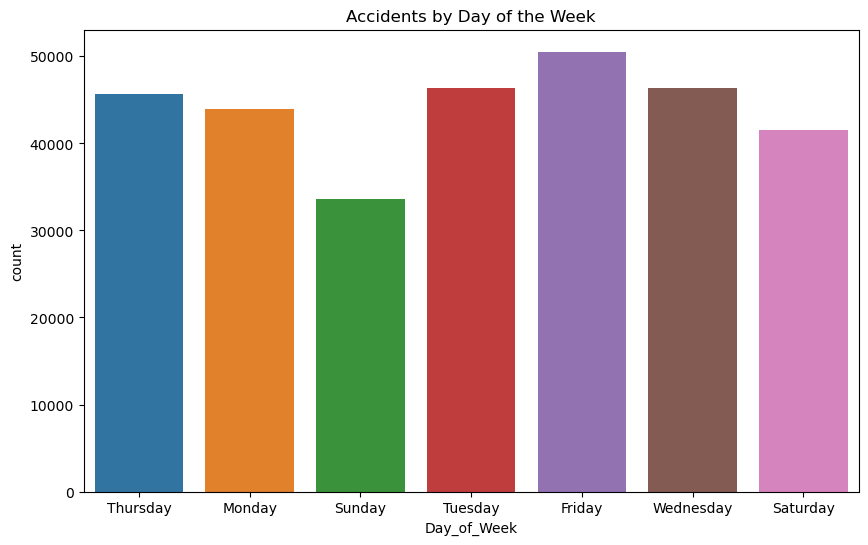

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day_of_Week')
plt.title('Accidents by Day of the Week')
plt.show()


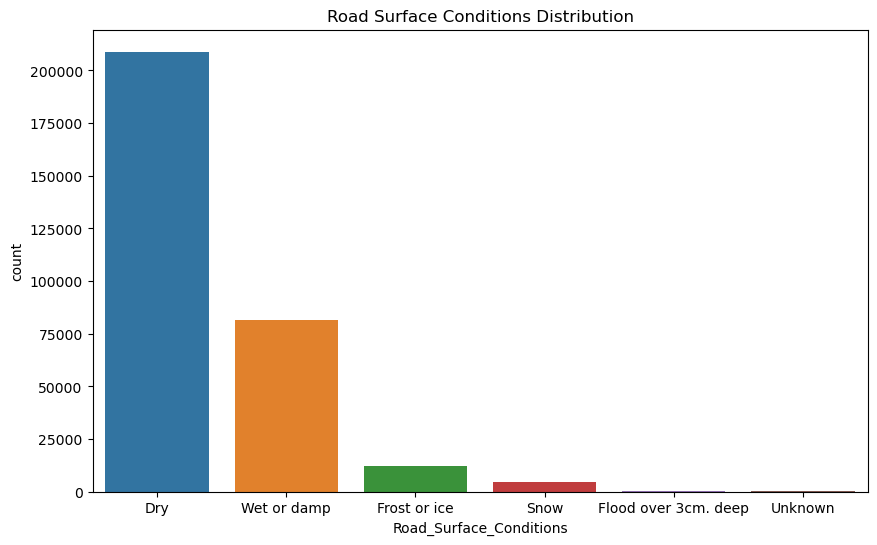

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Road_Surface_Conditions')
plt.title('Road Surface Conditions Distribution')
plt.show() 

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Light_Conditions', 
                       'Local_Authority_(District)', 'Carriageway_Hazards', 'Road_Surface_Conditions', 
                       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']
for col in categorical_columns:
    df.loc[:, col] = le.fit_transform(df[col])
print(df.head()) 

  Accident_Index Accident Date Day_of_Week Junction_Control Junction_Detail  \
0  200901BS70001    2021-01-01           4                4               8   
1  200901BS70002    2021-01-05           1                4               0   
2  200901BS70003    2021-01-04           3                4               8   
3  200901BS70004    2021-01-05           1                2               8   
4  200901BS70005    2021-01-06           5                2               0   

  Accident_Severity   Latitude Light_Conditions Local_Authority_(District)  \
0           Serious  51.512273                4                        185   
1           Serious  51.514399                4                        185   
2            Slight  51.486668                4                        185   
3           Serious  51.507804                4                        185   
4           Serious  51.482076                1                        185   

  Carriageway_Hazards  ...  Number_of_Casualties  Number

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = df[categorical_columns + ['Speed_limit', 'Number_of_Casualties', 'Number_of_Vehicles']]
y = df['Accident_Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 


              precision    recall  f1-score   support

       Fatal       0.04      0.01      0.02      1202
       Fetal       0.00      0.00      0.00        13
     Serious       0.19      0.07      0.11     12142
      Slight       0.86      0.95      0.90     79035

    accuracy                           0.82     92392
   macro avg       0.27      0.26      0.26     92392
weighted avg       0.76      0.82      0.79     92392

[[   15     1   116  1070]
 [    0     0     0    13]
 [   77     0   896 11169]
 [  263     5  3740 75027]]


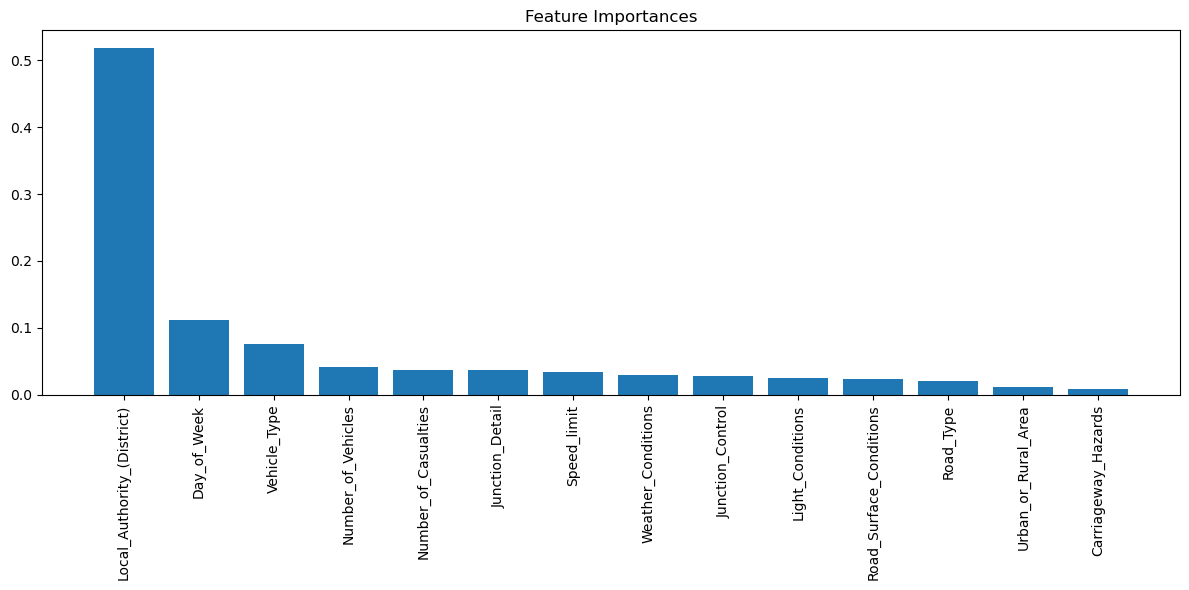

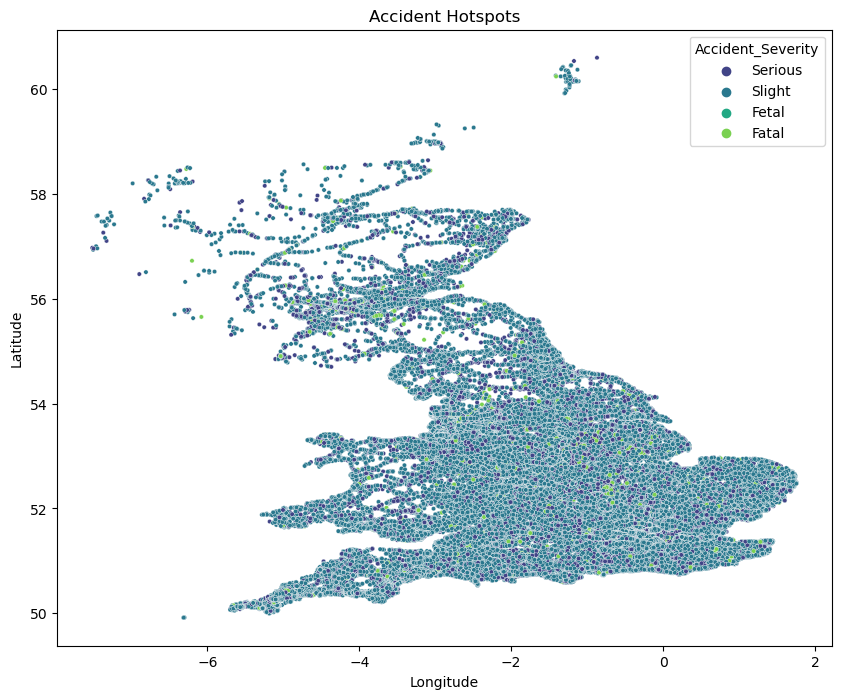

In [12]:
if 'model' in globals():
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title('Feature Importances')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Accident_Severity', palette='viridis', s=10)
    plt.title('Accident Hotspots')
    plt.show()
else:
    print("Model is not defined. Please ensure the model is trained before plotting feature importances.") 
 